In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
with open("/Users/andrii.pr/Downloads/access.log", "r") as file:
    lines = file.readlines()

In [3]:
# Transfer .log file into dataset

ip_address = []
timestamp = []
http_method = []
http_status = []
user_agent = []

for line in lines:
    line = line.strip()
    elements = line.split()

    ip_address.append(elements[0])
    timestamp.append(elements[3] + " " + elements[4])
    http_method.append(elements[5])
    http_status.append(elements[7])
    user_agent.append(" ".join(elements[11:]))

data = {
    "IP Address": ip_address,
    "Timestamp": timestamp,
    "HTTP Method": http_method,
    "HTTP Status": http_status,
    "User Agent": user_agent
}


In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,IP Address,Timestamp,HTTP Method,HTTP Status,User Agent
0,1.202.218.8,[20/Jun/2012:19:05:12 +0200],"""GET","HTTP/1.0""","""\""Mozilla/5.0"""
1,208.115.113.91,[20/Jun/2012:19:20:16 +0200],"""GET","HTTP/1.1""","""Mozilla/5.0 (compatible; Ezooms/1.0; ezooms.b..."
2,123.125.71.20,[20/Jun/2012:19:30:40 +0200],"""GET","HTTP/1.1""","""Mozilla/5.0 (compatible; Baiduspider/2.0; +ht..."
3,220.181.108.101,[20/Jun/2012:19:31:01 +0200],"""GET","HTTP/1.1""","""Mozilla/5.0 (compatible; Baiduspider/2.0; +ht..."
4,123.125.68.79,[20/Jun/2012:19:53:24 +0200],"""GET","HTTP/1.1""","""Mozilla/5.0 (compatible; Baiduspider/2.0; +ht..."


In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='[%d/%b/%Y:%H:%M:%S %z]')
df['Date'] = df['Timestamp'].dt.date

In [7]:
user_count_per_day = df.groupby('Date')['IP Address'].nunique()
print(user_count_per_day)

Date
2012-06-20    21
2012-06-21    69
2012-06-22    68
2012-06-23    83
2012-06-24    78
2012-06-25    73
2012-06-26    90
2012-06-27    73
2012-06-28    88
2012-06-29    93
2012-06-30    98
2012-07-01    82
2012-07-02    30
Name: IP Address, dtype: int64


In [8]:
user_agent_counts = df.groupby('User Agent').size().reset_index(name='Count')

# Sort the grouped dataset in descending order based on the count of occurrences
sorted_user_agents = user_agent_counts.sort_values('Count', ascending=False)

# Print the result
print(sorted_user_agents)

                                            User Agent  Count
70   "Mozilla/5.0 (compatible; Baiduspider/2.0; +ht...    556
82   "Mozilla/5.0 (compatible; YandexBot/3.0; +http...    276
77   "Mozilla/5.0 (compatible; MJ12bot/v1.4.3; http...    234
96                                     "\"Mozilla/5.0"    130
74   "Mozilla/5.0 (compatible; Googlebot/2.1; +http...    128
..                                                 ...    ...
61   "Mozilla/5.0 (Windows; U; Windows NT 5.1; sv-S...      1
60   "Mozilla/5.0 (Windows; U; Windows NT 5.1; fr; ...      1
56   "Mozilla/5.0 (Windows; U; Windows NT 5.1; cs; ...      1
54   "Mozilla/5.0 (Windows NT 6.1; rv:7.0.1) Gecko/...      1
105  CPU iPhone OS 3 0 like Mac OS X) AppleWebKit (...      1

[106 rows x 2 columns]


In [9]:
def extract_operating_system(user_agent):
    match = re.search(r'\(([^\)]+)\)', user_agent)
    if match:
        info = match.group(1)
        os_info = info.split(';')[0]
        return os_info.strip()
    else:
        return 'Unknown'

df['Operating System'] = df['User Agent'].apply(extract_operating_system)

# Group the dataset by the operating system and count occurrences
operating_system_counts = df.groupby('Operating System').size().reset_index(name='Count')

# Sort the grouped dataset in descending order based on the count of occurrences
sorted_operating_systems = operating_system_counts.sort_values('Count', ascending=False)

# Print the result
print(sorted_operating_systems)


                                     Operating System  Count
20                                         compatible   1572
12                                            Unknown    200
16                                     Windows NT 6.1     66
14                                     Windows NT 5.1     50
18                                     bot@wotbox.com     21
13                                            Windows     17
3             +http://www.baidu.com/search/spider.htm     17
15                                     Windows NT 6.0     17
1                          +http://fulltext.sblog.cz/     17
25                                    www.aghaven.com     16
22           http://www.backlinktest.com/crawler.html     16
5           +http://www.google.com/mobile/adsbot.html     14
2        +http://wortschatz.uni-leipzig.de/findlinks/     12
21                   http://www.aboundex.com/crawler/     11
26                         www.metadatalabs.com/mlbot     10
17                      

In [10]:
bot_pattern = r'(Googlebot|Bingbot|YandexBot)'
bot_df = df[df['User Agent'].str.contains(bot_pattern, regex=True)]
print(bot_df)

           IP Address                 Timestamp HTTP Method HTTP Status  \
5     178.154.210.252 2012-06-20 19:54:10+02:00        "GET   HTTP/1.1"   
14       66.249.72.65 2012-06-20 21:28:00+02:00        "GET   HTTP/1.1"   
15       66.249.72.65 2012-06-20 21:28:00+02:00        "GET   HTTP/1.1"   
18    178.154.210.252 2012-06-20 21:45:12+02:00        "GET   HTTP/1.1"   
84       66.249.72.65 2012-06-21 05:59:24+02:00        "GET   HTTP/1.1"   
...               ...                       ...         ...         ...   
2080    66.249.66.140 2012-07-02 02:05:49+02:00        "GET   HTTP/1.1"   
2081    66.249.66.140 2012-07-02 02:05:49+02:00        "GET   HTTP/1.1"   
2085      66.249.66.1 2012-07-02 03:47:36+02:00        "GET   HTTP/1.1"   
2096  178.154.210.252 2012-07-02 07:20:22+02:00        "GET   HTTP/1.1"   
2097  178.154.210.252 2012-07-02 07:20:24+02:00        "GET   HTTP/1.1"   

                                             User Agent        Date  \
5     "Mozilla/5.0 (compatib

/var/folders/v0/3jkkjlw52zd4ybpbpy72fgv40000gn/T/ipykernel_10386/216862944.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bot_df = df[df['User Agent'].str.contains(bot_pattern, regex=True)]


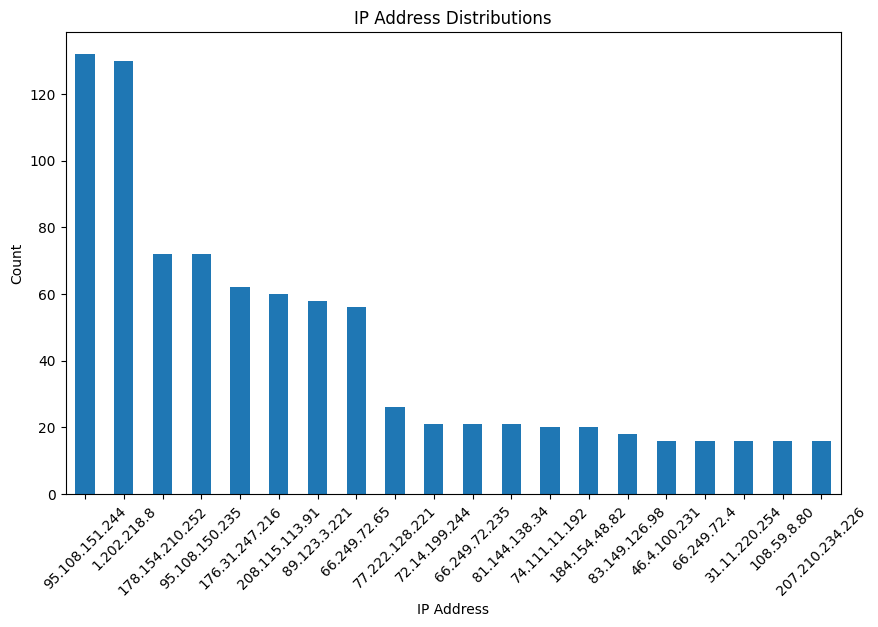

In [11]:
ip_counts = df['IP Address'].value_counts().head(20)

# Plot the IP address distributions
plt.figure(figsize=(10, 6))
ip_counts.plot(kind='bar')
plt.xlabel('IP Address')
plt.ylabel('Count')
plt.title('IP Address Distributions')
plt.xticks(rotation=45)
plt.show()

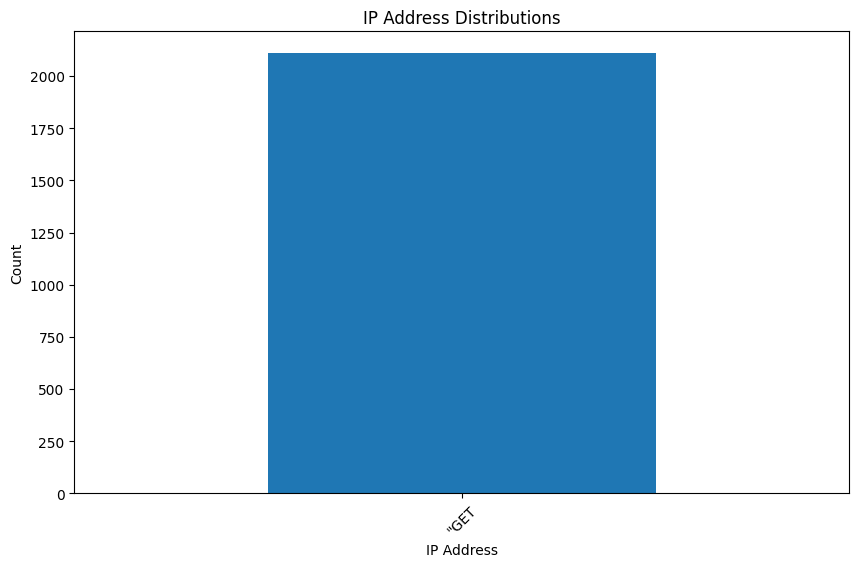

In [12]:
ip_counts = df['HTTP Method'].value_counts()

# Plot the IP address distributions
plt.figure(figsize=(10, 6))
ip_counts.plot(kind='bar')
plt.xlabel('IP Address')
plt.ylabel('Count')
plt.title('IP Address Distributions')
plt.xticks(rotation=45)
plt.show()